In [1]:
import matplotlib.pyplot as plt
import nidaqmx.system
system = nidaqmx.system.System.local()
system.driver_version

DriverVersion(major_version=20, minor_version=1, update_version=0)

In [2]:
dev=system.devices.device_names[0] # autodetect first device
dev

'DevSim'

In [3]:
import numpy as np

#generate fake sig
Fs=1e6
fex=20e3
t=np.arange(-5/fex,11/fex,1/Fs)
Ve=(t>0)*(t<10/fex)*np.sin(t*fex*2*np.pi)

# ensure the the array is good to send to daqmx
Ve=np.ascontiguousarray(Ve)


# AO write

In [4]:
taskAO=nidaqmx.Task()
# create the channel
ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)  
# configure sample rate
taskAO.timing.cfg_samp_clk_timing(1e6, samps_per_chan=Ve.size)
# Put datasd into buffer and start task
taskAO.write(Ve,auto_start=True)  
taskAO.wait_until_done()
taskAO.stop()

In [5]:
help(taskAO.ao_channels.add_ao_voltage_chan)
taskAO.close()

Help on method add_ao_voltage_chan in module nidaqmx._task_modules.ao_channel_collection:

add_ao_voltage_chan(physical_channel, name_to_assign_to_channel='', min_val=-10.0, max_val=10.0, units=<VoltageUnits.VOLTS: 10348>, custom_scale_name='') method of nidaqmx._task_modules.ao_channel_collection.AOChannelCollection instance
    Creates channel(s) to generate voltage.
    
    Args:
        physical_channel (str): Specifies the names of the physical
            channels to use to create virtual channels. The DAQmx
            physical channel constant lists all physical channels on
            devices and modules installed in the system.
        name_to_assign_to_channel (Optional[str]): Specifies a name
            to assign to the virtual channel this function creates.
            If you do not specify a value for this input, NI-DAQmx
            uses the physical channel name as the virtual channel
            name.
        min_val (Optional[float]): Specifies in **units** the
    

In [6]:
with nidaqmx.Task() as taskAO:
    # create the channel
    ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)  
    # configure sample rate
    taskAO.timing.cfg_samp_clk_timing(1e6, samps_per_chan=Ve.size)
    # Put datasd into buffer and start task
    taskAO.write(Ve,auto_start=True)  
    taskAO.wait_until_done()
    taskAO.stop()


# AI read

In [7]:
nsamples=100000
taskAI=nidaqmx.Task()
# create the channel
aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)  
# configure sample rate
taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
taskAI.start() 
taskAI.wait_until_done()
datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
taskAI.stop()

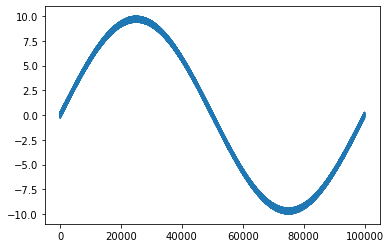

In [8]:
plt.plot(datas)

In [9]:
help(taskAI.read)
taskAI.close()

Help on method read in module nidaqmx.task:

read(number_of_samples_per_channel=<nidaqmx.task.UnsetNumSamplesSentinel object at 0x000001F6C389FE80>, timeout=10.0) method of nidaqmx.task.Task instance
    Reads samples from the task or virtual channels you specify.
    
    This read method is dynamic, and is capable of inferring an appropriate
    return type based on these factors:
    - The channel type of the task.
    - The number of channels to read.
    - The number of samples per channel.
    
    The data type of the samples returned is independently determined by
    the channel type of the task.
    
    For digital input measurements, the data type of the samples returned
    is determined by the line grouping format of the digital lines.
    If the line grouping format is set to "one channel for all lines", the
    data type of the samples returned is int. If the line grouping
    format is set to "one channel per line", the data type of the samples
    returned is boolean.

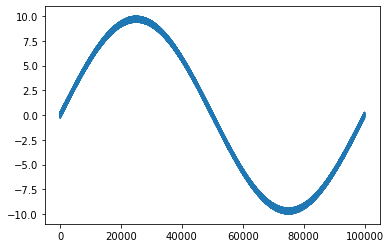

In [10]:
nsamples=100000
with nidaqmx.Task() as taskAI:
    # create the channel
    aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)  
    # configure sample rate
    taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
    taskAI.start() 
    taskAI.wait_until_done()
    datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
    taskAI.stop()
    plt.plot(datas)